In [98]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

<h1>Checkpoint 2</h1>

<h3>Checkpoint 2.a - Data preprocessing</h3>

In [119]:
# Load and convert types
# (a) Import
# (b) Parse

car_sales_df = pd.read_csv("car_sales_data.csv")
display(car_sales_df.head())
car_sales_df[["Manufacturer", "Model", "Fuel type"]] = car_sales_df[["Manufacturer", "Model", "Fuel type"]].astype("string")
display(car_sales_df.dtypes)

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


Manufacturer           string[python]
Model                  string[python]
Engine size                   float64
Fuel type              string[python]
Year of manufacture             int64
Mileage                         int64
Price                           int64
dtype: object

In [121]:
# Data Testing/Cleaning
display(car_sales_df.isna().sum())

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

<h3>Checkpoint 2.b - Basic data exploration and summary statistics</h3>

**#1 - Sumary Statistics**

We will provide descriptive statistics about the dataframe as well as visualizations for the numerical values.

From our analysis we can see that there are 50,000 entries in the dataset, representing 5 different manufacturers each with 3 models. The most popular car in the dataset is the Ford Mondeo with 5058 entries.

Our visualizations show us that most numerical values are right skewed, except for year of manufacture, which is approximatley normal. Price is the most right-skewed metric in the set. We have plotted the 25th, 75th, and 99th percentiles along with the mean to illustrate this.

In [129]:
# Describe the dataframe
car_sales_df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [164]:
# Number of different manufacturers and their representation in the dataset
print(f"Manufacturers:")
display(car_sales_df["Manufacturer"].unique())

print("\nCount of Models by Manufacturers:")
display(car_sales_df.groupby('Manufacturer')["Model"].unique())

print("\nUnique Car Models:")
display(car_sales_df["Model"].unique())

print("\nCount of Entries by Model:")
display(car_sales_df.groupby("Model")["Manufacturer"].count())

Manufacturers:


<StringArray>
['Ford', 'Porsche', 'Toyota', 'VW', 'BMW']
Length: 5, dtype: string


Count of Models by Manufacturers:


Manufacturer
BMW                      [Z4, M5, X3]
Ford          [Fiesta, Mondeo, Focus]
Porsche    [718 Cayman, 911, Cayenne]
Toyota           [RAV4, Prius, Yaris]
VW               [Polo, Golf, Passat]
Name: Model, dtype: object


Unique Car Models:


<StringArray>
[    'Fiesta', '718 Cayman',     'Mondeo',       'RAV4',       'Polo',
      'Focus',      'Prius',       'Golf',         'Z4',      'Yaris',
        '911',     'Passat',         'M5',    'Cayenne',         'X3']
Length: 15, dtype: string


Count of Entries by Model:


Model
718 Cayman     867
911            872
Cayenne        870
Fiesta        4925
Focus         4976
Golf          5050
M5            1645
Mondeo        5058
Passat        4871
Polo          4992
Prius         4171
RAV4          4292
X3            1632
Yaris         4091
Z4            1688
Name: Manufacturer, dtype: int64

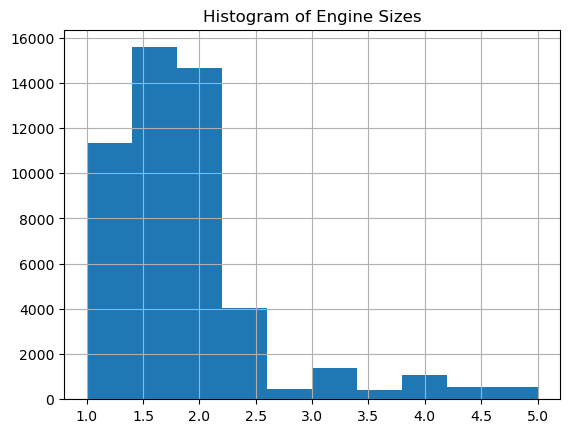

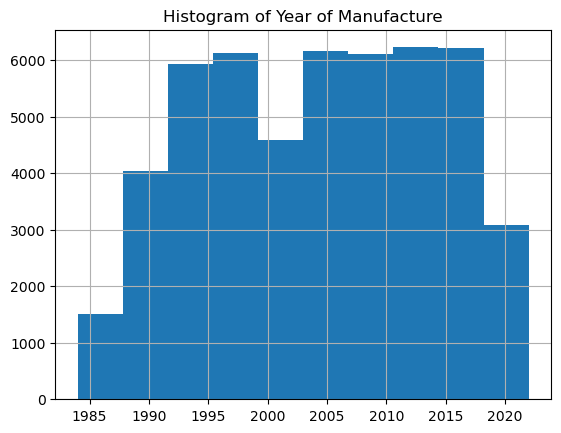

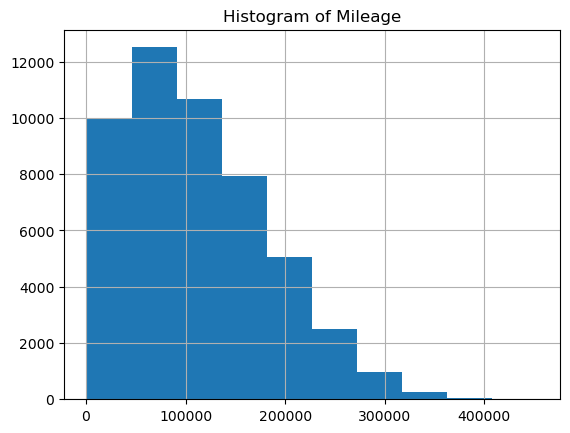

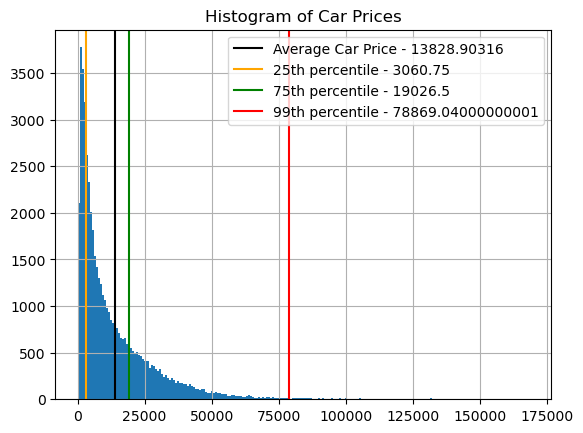

In [186]:
# Histograms of numerical data
car_sales_df["Engine size"].hist()
plt.title("Histogram of Engine Sizes")
plt.show()

car_sales_df["Year of manufacture"].hist()
plt.title("Histogram of Year of Manufacture")
plt.show()

car_sales_df["Mileage"].hist()
plt.title("Histogram of Mileage")
plt.show()

# The pretty plot
car_sales_df["Price"].hist(bins=int(math.sqrt(car_sales_df["Price"].size)))
plt.axvline(car_sales_df["Price"].mean(), label=f"Average Car Price - {car_sales_df['Price'].mean()}", color="black")
plt.axvline(car_sales_df["Price"].quantile(.25), label=f"25th percentile - {car_sales_df['Price'].quantile(.25)}", color="orange")
plt.axvline(car_sales_df["Price"].quantile(.75), label=f"75th percentile - {car_sales_df['Price'].quantile(.75)}", color="green")
plt.axvline(car_sales_df["Price"].quantile(.99), label=f"99th percentile - {car_sales_df['Price'].quantile(.99)}", color="red")
plt.title("Histogram of Car Prices")
plt.legend()
plt.show()

**#2 - The Evolution of Engine Size over Time**

We investigate if there is a significant linear trend in the average engine size over time. We stratify by manufacturer to control for a potential confounding variable.

h0 : Average engine size for each manufacturer does not get smaller over time
ha : Average engine size for each manufacturer gets smaller over time